In [331]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from konlpy.tag import Mecab
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())

In [332]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

### 1. 요일,일자, 년, 월, 일, 주 변환

In [334]:
def transform_day_to_num(x) :
    if x == '월' :
        return 5
    elif x == '화' :
        return 4
    elif x == '수' :
        return 3
    elif x == '목' :
        return 2
    else :
        return 1        

In [335]:
train['요일'] = train['요일'].apply(transform_day_to_num)
test['요일'] = test['요일'].apply(transform_day_to_num)

***

In [336]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

In [337]:
train['년'] = train['일자'].dt.year
test['년'] = test['일자'].dt.year

In [338]:
train['월'] = train['일자'].dt.month
test['월'] = test['일자'].dt.month

In [339]:
train['일'] = train.일자.dt.day
test['일'] = test.일자.dt.day

In [340]:
train['주'] = train.일자.dt.week
test['주'] = test.일자.dt.week

### 2. 현본사소속재택근무자수를 이용한 코로나 단계

In [341]:
def transform_corona(x) :
    if x <1 :
        return 3
    elif x < 134:
        return 2
    elif x < 221 :
        return 1
    else :
        return 0

In [342]:
train['코로나단계']=train['현본사소속재택근무자수'].apply(transform_corona)
test['코로나단계']=test['현본사소속재택근무자수'].apply(transform_corona)

### 3. 휴가 간 퍼센트를 수치로 하여 열 생성

In [350]:
train['휴가비율']=(train.본사휴가자수/train.본사정원수)*100
test['휴가비율']=(test.본사휴가자수/test.본사정원수)*100

In [351]:
def transform_rest(x) :
    if x <2.569236 :
        return 0
    elif x< 3.734756:
        return 1
    elif x< 6.562848:
        return 2
    else :
        return 3

In [352]:
train['휴가퍼센트']=train['휴가비율'].apply(transform_rest)
test['휴가퍼센트']=test['휴가비율'].apply(transform_rest)

### 4. 출장 간 퍼센트를 수치로 하여 열 생성

In [353]:
train['출장비율']=(train.본사출장자수/train.본사정원수)*100
test['출장비율']=(test.본사출장자수/test.본사정원수)*100

In [354]:
for i in np.arange(0.25,1,0.25):
    print(int(i*100),'%: ',train.출장비율.quantile(q=i))

25 %:  7.685325264750379
50 %:  8.803353658536585
75 %:  9.844372059355774


In [355]:
def f1(x) :
    if x <7.685325264750379 :
        return 0
    elif x< 8.803353658536585:
        return 1
    elif x< 9.844372059355774:
        return 2
    else :
        return 3

In [356]:
train['출장퍼센트']=train['출장비율'].apply(f1)
test['출장퍼센트']=test['출장비율'].apply(f1)

### 5. 공휴일을 직접 수작업으로 지정하고 원핫인코딩

In [362]:
train['공휴일전후'] = 0
test['공휴일전후'] = 0

In [363]:
train['공휴일전후'][17] = 1
train['공휴일전후'][3] = 1
train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][224] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 2
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 2
# train['공휴일전후'][501] = 1
# train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 1
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 1
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 1
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 2
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 1
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후'][10] =2
test['공휴일전후'][20] = 1

**원핫인코딩**

In [364]:
train = pd.get_dummies(train, columns=['공휴일전후'])
test = pd.get_dummies(test, columns=['공휴일전후'])

In [365]:
test['공휴일전후_0'][20] =1
test['공휴일전후_1'][20] = 0

### 6. 메뉴 토큰화하여 일반적인 계산으로 해준 것

In [366]:
train['조식메뉴토큰'] = train['조식메뉴'].str.split(' ')
train['중식메뉴토큰'] = train['중식메뉴'].str.split(' ')
train['석식메뉴토큰'] = train['석식메뉴'].str.split(' ')

test['조식메뉴토큰'] = test['조식메뉴'].str.split(' ')
test['중식메뉴토큰'] = test['중식메뉴'].str.split(' ')
test['석식메뉴토큰'] = test['석식메뉴'].str.split(' ')

In [367]:
def get_menu_comp_cnt(data) :
    menu_cnt = []
    for token in data :
        comp_cnt = 0
        for text in token :
            if (len(text) > 1) & (text.startswith("(") != 1) :
                comp_cnt += 1
            else :
                pass
        menu_cnt.append(comp_cnt)
    return menu_cnt

In [368]:
train['조식메뉴수'] = get_menu_comp_cnt(train['조식메뉴토큰'])
train['중식메뉴수'] = get_menu_comp_cnt(train['중식메뉴토큰'])
train['석식메뉴수'] = get_menu_comp_cnt(train['석식메뉴토큰'])

test['조식메뉴수'] = get_menu_comp_cnt(test['조식메뉴토큰'])
test['중식메뉴수'] = get_menu_comp_cnt(test['중식메뉴토큰'])
test['석식메뉴수'] = get_menu_comp_cnt(test['석식메뉴토큰'])

In [369]:
def get_menu_nunique(data) :
    menu_n_list = []
    for token in data :
        menu_n = 0
        for text in token :
            if  '/' in text  :
                menu_nunique = text.count('/') + 1
                menu_n += menu_nunique
            else :
                pass
        menu_n_list.append(menu_n)
    return menu_n_list

In [370]:
train['석식선택메뉴'] = get_menu_nunique(train['석식메뉴토큰'])
train['중식선택메뉴'] = get_menu_nunique(train['중식메뉴토큰'])
train['조식선택메뉴'] = get_menu_nunique(train['조식메뉴토큰'])

In [371]:
test['석식선택메뉴'] = get_menu_nunique(test['석식메뉴토큰'])
test['중식선택메뉴'] = get_menu_nunique(test['중식메뉴토큰'])
test['조식선택메뉴'] = get_menu_nunique(test['조식메뉴토큰'])

***

In [372]:
def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

train['중식메뉴_split'] = train['중식메뉴'].apply(lambda x: get_food_embedding(x))
train['석식메뉴_split'] = train['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [373]:
test['중식메뉴_split'] = test['중식메뉴'].apply(lambda x: get_food_embedding(x))
test['석식메뉴_split'] = test['석식메뉴'].apply(lambda x: get_food_embedding(x))

### 7. 출근한 인원 퍼센트

In [374]:
train['출근'] = train['본사정원수']-(train['본사휴가자수']+train['본사출장자수']+train['현본사소속재택근무자수'])
test['출근'] = test['본사정원수']-(test['본사휴가자수']+test['본사출장자수']+test['현본사소속재택근무자수'])

In [375]:
for i in np.arange(0.25,1,0.25):
    print(int(i*100),'%: ',train.출근.quantile(q=i))

25 %:  2281.0
50 %:  2357.0
75 %:  2461.0


In [376]:
def f1(x) :
    if x <2281.0 :
        return 0
    elif x< 2357.0:
        return 1
    elif x< 2461.0:
        return 2
    else :
        return 3

In [377]:
train['출근퍼센트']=train['출근'].apply(f1)
test['출근퍼센트']=test['출근'].apply(f1)

### 8. 월을 이용하여 계절

In [379]:
def transform_season(x) :
    if 3<=x<=5 :
        return '봄'
    elif 6<=x<=8:
        return '여름'
    elif 9<=x<=11 :
        return '가을'
    else :
        return '겨울'

In [380]:
train['월_계절']=train['월'].apply(transform_season)
test['월_계절']=test['월'].apply(transform_season)

In [381]:
train = pd.concat([train, pd.get_dummies(train['월_계절'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['월_계절'])], axis=1)

### 9. 주를 이용한 계절

In [382]:
def transform_week(x) :
    if 9<=x<=22 :
        return '주_봄'
    elif 23<=x<=35:
        return '주_여름'
    elif 36<=x<=48 :
        return '주_가을'
    else :
        return '주_겨울'

In [383]:
train['주_계절']=train['주'].apply(transform_week)
test['주_계절']=test['주'].apply(transform_week)

In [384]:
train = pd.concat([train, pd.get_dummies(train['주_계절'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['주_계절'])], axis=1)

In [385]:
test['주_가을']=0
test['주_여름']=0
test['가을']=0
test['여름']=0

### 10. 월초, 월중, 월말을 만들기 위해 일자를 이용한 원핫인코딩

In [386]:
def transform_day(x) :
    if 1<=x<=10 :
        return '초_일'
    elif 11<=x<=20:
        return '중_일'
    else :
        return '말_일'

In [387]:
train['초중말일자']=train['일'].apply(transform_day)
test['초중말일자']=test['일'].apply(transform_day)

In [388]:
train = pd.concat([train, pd.get_dummies(train['초중말일자'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['초중말일자'])], axis=1)

### 중식, 석식에 영향을 끼칠 것 같은 피쳐만 셀렉션

In [ ]:
X1 = train[['월','년','요일','출장퍼센트','휴가퍼센트','코로나단계','말_일','중_일','공휴일전후_0','초_일','중식메뉴수','공휴일전후_1','주_봄','봄','주_가을','가을','주_겨울','겨울','공휴일전후_2']]
y1 = train.중식계
target1 = test[X1.columns]

In [512]:
X2 = train[['요일', '년', '월', '코로나단계', '휴가퍼센트', '출장퍼센트', '공휴일전후_0', '공휴일전후_1', '공휴일전후_2', '석식메뉴수', '출근퍼센트', '겨울', '봄', '주_겨울', '주_가을', '가을', '말_일', '초_일','본사시간외근무명령서승인건수']]
y2 = train.석식계
target2 = test[X2.columns]

## Modeling

In [389]:
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from ngboost import NGBRegressor

In [390]:
kf = KFold(n_splits = 15, random_state = 607, shuffle = True)

### LGBM

#### 중식

In [513]:
lgbm = LGBMRegressor(random_state = 607, max_depth = 4, n_estimators = 20000, learning_rate = .01)

In [514]:
lgbm_pred_1 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X1):
    tr_x, val_x = X1.iloc[tr_idx], X1.iloc[val_idx]
    tr_y, val_y = y1.iloc[tr_idx], y1.iloc[val_idx]
    lgbm.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], eval_metric = 'mean_absolute_error', early_stopping_rounds = 2000, verbose = 2000)
    pred = lgbm.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = lgbm.predict(target1) / 15
    lgbm_pred_1 += sub_pred
print(f'\n{lgbm.__class__.__name__} MAE = {np.mean(mae_list)}')

Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 54.6452	training's l2: 5288.38	valid_1's l1: 72.6131	valid_1's l2: 11142.3
Early stopping, best iteration is:
[288]	training's l1: 74.8833	training's l2: 9881.82	valid_1's l1: 73.358	valid_1's l2: 9498.24
FOLD MAE = 73.35804953295423
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 56.1794	training's l2: 5650.49	valid_1's l1: 68.2422	valid_1's l2: 7628.51
[4000]	training's l1: 51.7791	training's l2: 4684.38	valid_1's l1: 68.0304	valid_1's l2: 7593.91
[6000]	training's l1: 48.2598	training's l2: 4000.11	valid_1's l1: 69.2333	valid_1's l2: 7601.18
Early stopping, best iteration is:
[4377]	training's l1: 50.8348	training's l2: 4492.75	valid_1's l1: 67.2388	valid_1's l2: 7426.13
FOLD MAE = 67.23879993610058
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 54.2706	training's l2: 5306.97	valid_1's l1: 79.9451	valid_1's l2: 11683.1
[4000]

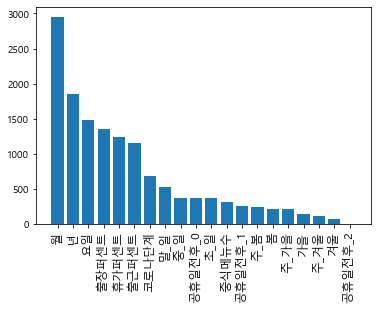

In [516]:
a=pd.DataFrame(data=lgbm.feature_importances_,index=X1.columns)
a=a.sort_values(by=0,ascending=False)
a.columns=['value']

plt.bar(a.index, a.value)
plt.xticks(fontsize=12, rotation='vertical') 
plt.show()

#### 석식

In [517]:
#### 중식lgbm_pred_2 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X2):
    tr_x, val_x = X2.iloc[tr_idx], X2.iloc[val_idx]
    tr_y, val_y = y2.iloc[tr_idx], y2.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], eval_metric = 'mean_absolute_error', early_stopping_rounds = 2000, verbose = 2000)
    pred = lgbm.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    print(f'FOLD MAE = {mae}')
    mae_list.append(mae)
    sub_pred = lgbm.predict(target2) / 15
    lgbm_pred_2 += sub_pred
print(f'\n{lgbm.__class__.__name__} MAE = {np.mean(mae_list)}')

Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 33.7666	training's l2: 2183.63	valid_1's l1: 53.3843	valid_1's l2: 5188.85
Early stopping, best iteration is:
[1062]	training's l1: 36.634	training's l2: 2619.48	valid_1's l1: 52.6661	valid_1's l2: 5018.79
FOLD MAE = 52.66606674111978
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 33.6406	training's l2: 2020.2	valid_1's l1: 49.6769	valid_1's l2: 8096.75
Early stopping, best iteration is:
[809]	training's l1: 38.2948	training's l2: 2653.8	valid_1's l1: 48.5952	valid_1's l2: 8142.31
FOLD MAE = 48.59523398921298
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 34.4335	training's l2: 2156.98	valid_1's l1: 50.6925	valid_1's l2: 5014.91
Early stopping, best iteration is:
[759]	training's l1: 38.503	training's l2: 2818.1	valid_1's l1: 50.7606	valid_1's l2: 4892.55
FOLD MAE = 50.76061781244508
Training until validation scores don't impro

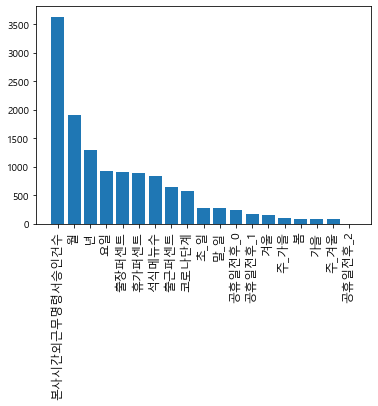

In [519]:
a=pd.DataFrame(data=lgbm.feature_importances_,index=X2.columns)
a=a.sort_values(by=0,ascending=False)
a.columns=['value']

plt.bar(a.index, a.value)
plt.xticks(fontsize=12, rotation='vertical') 
plt.show()

In [520]:
submission['중식계'] = lgbm_pred_1
submission['석식계'] = lgbm_pred_2

In [522]:
submission.to_csv('lgbm_07.csv', index = False)

### NGB

#### 중식

In [523]:
ngb = NGBRegressor(n_estimators = 15000, verbose = 0, random_state = 607)

In [524]:
ngb_pred_1 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X1):
    tr_x, val_x = X1.iloc[tr_idx], X1.iloc[val_idx]
    tr_y, val_y = y1.iloc[tr_idx], y1.iloc[val_idx]
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 2000)
    pred = ngb.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = ngb.predict(target1) / 15
    ngb_pred_1 += sub_pred
print(f'\n{ngb.__class__.__name__} MAE = {np.mean(mae_list)}')

FOLD MAE = 68.52939919670436
FOLD MAE = 60.61060259616154
FOLD MAE = 69.41053064986316
FOLD MAE = 54.668099204498716
FOLD MAE = 49.444953463857516
FOLD MAE = 55.472850734370276
FOLD MAE = 48.53444714166642
FOLD MAE = 51.78807999756746
FOLD MAE = 51.00210509203896
FOLD MAE = 55.66699381176394
FOLD MAE = 60.50610443674434
FOLD MAE = 40.70761527556759
FOLD MAE = 49.149894710069
FOLD MAE = 60.16206974661795
FOLD MAE = 54.54492195251173

NGBRegressor MAE = 55.34657786733353


#### 석식

In [526]:
ngb = NGBRegressor(n_estimators = 15000, verbose = 0, random_state = 607)

In [527]:
ngb_pred_2 = np.zeros((target2.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X2):
    tr_x, val_x = X2.iloc[tr_idx], X2.iloc[val_idx]
    tr_y, val_y = y2.iloc[tr_idx], y2.iloc[val_idx]
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 2000)
    pred = ngb.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = ngb.predict(target2) / 15
    ngb_pred_2 += sub_pred
print(f'\n{ngb.__class__.__name__} MAE = {np.mean(mae_list)}')

FOLD MAE = 53.620089388824255
FOLD MAE = 35.84246453190883
FOLD MAE = 35.593520177703475
FOLD MAE = 30.408097722400782
FOLD MAE = 30.38624363557233
FOLD MAE = 27.471863461923533
FOLD MAE = 28.23868160639055
FOLD MAE = 27.307321354338264
FOLD MAE = 28.266087482216772
FOLD MAE = 28.596641791728644
FOLD MAE = 27.49812351402219
FOLD MAE = 27.04181848865856
FOLD MAE = 23.080510653325188
FOLD MAE = 29.087625053996657
FOLD MAE = 22.761600460323756

NGBRegressor MAE = 30.346712621555586


In [529]:
submission['중식계'] = ngb_pred_1
submission['석식계'] = ngb_pred_2

In [530]:
submission.to_csv('nbg_07.csv', index = False)

### 앙상블

In [531]:
nbg=pd.read_csv('nbg_07.csv')
lgbm=pd.read_csv('lgbm_07.csv')

ensemble=nbg.copy()
ensemble['중식계']=nbg['중식계']*0.3+lgbm['중식계']*0.7
ensemble['석식계']=nbg['석식계']*0.3+lgbm['석식계']*0.7

In [546]:
ensemble.head()

,일자,중식계,석식계
0,2021-01-27,974.849875,292.509755
1,2021-01-28,932.584555,398.912877
2,2021-01-29,624.559373,261.433374
3,2021-02-01,1356.530572,525.461233
4,2021-02-02,1094.644289,466.315394


### 1번째 서브미션

In [547]:
ensemble.to_csv('ensemble_07.csv', index = False)